# Algotytm przecinania się odcinków na płaszczyźnie

In [1]:
%pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tests.test4 import Test
from visualizer.main import Visualizer

# Przydatne funkcje 

In [4]:
def draw_example_1():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

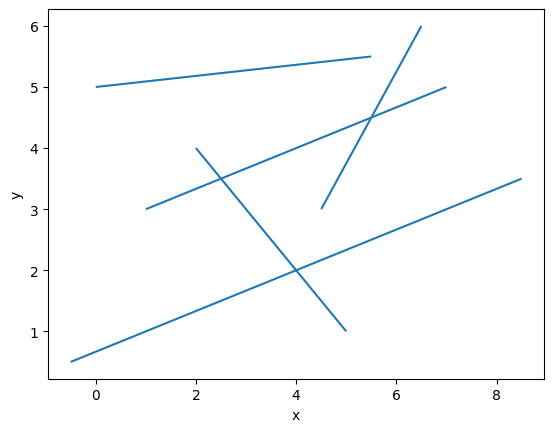

In [5]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

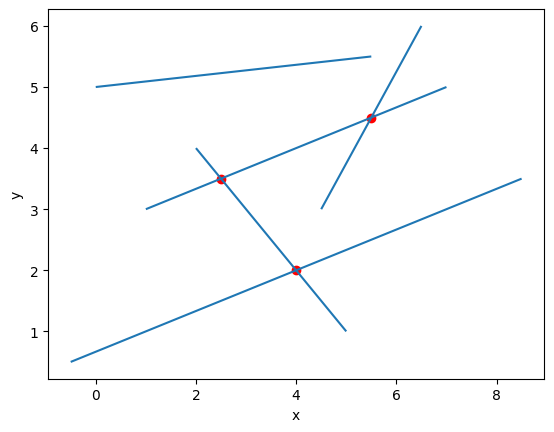

In [6]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [7]:
from random import uniform, randint
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """
    result = []
    for _ in range(n):
        x1 = uniform(0,max_x)
        y1 = uniform(0,max_y)
        x2 = uniform(0,x1) if randint(0,1) == 1 else uniform(x1,max_x)
        y2 = uniform(0,max_y)
        result.append(((x1,y1),(x2,y2)))
    return result

In [8]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.078s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [9]:
section = generate_uniform_sections(1000,1000,20)

Zwizualizuj otrzymane odcinki

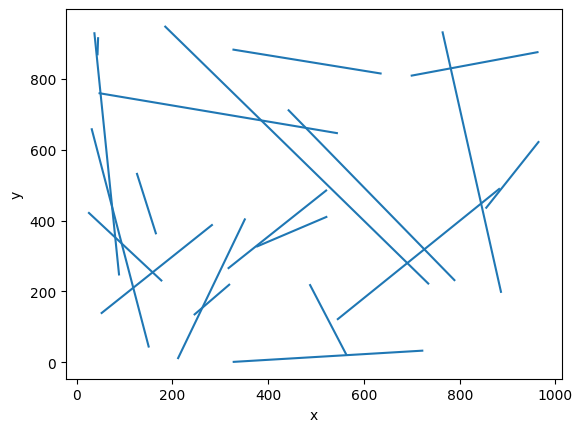

In [10]:
vis = Visualizer()

vis.add_line_segment(section)
# vis.add_point(points, color='red')
vis.show()

Uzupełnij funkcję ```add_sections``` - interaktywne dodawanie odcinków przez rysowanie myszką

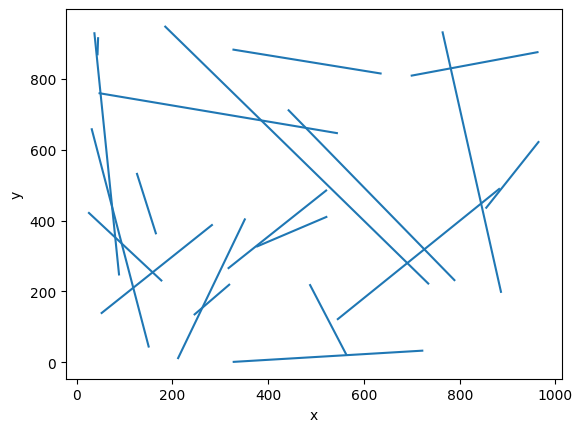

In [11]:

def add_sections(sections):
    def on_click(event):
        nonlocal sections
        if event.inaxes:
            x, y = event.xdata, event.ydata
            # Append the clicked point to the sections list
            sections.append((x, y))
            # Plot the point
            event.inaxes.plot(x, y, 'ro')  # 'ro' is for red circle markers
            event.inaxes.figure.canvas.draw()  # Update the canvas
    
    # Create a plot
    vis = Visualizer()

    vis.add_line_segment(section)
    vis.show()

# Call the function with an empty list to store points
sections_list = []
add_sections(sections_list)

Uzupełnij funkcję ```is_intersection```

In [12]:
def on_segment(p, q, r): 
    if ( (q.x <= max(p.x, r.x)) and (q.x >= min(p.x, r.x)) and 
           (q.y <= max(p.y, r.y)) and (q.y >= min(p.y, r.y))): 
        return True
    return False
  
def det(a,b,c):
    return (b[0] - a[0]) * (c[1] - b[1]) - (b[1] - a[1]) * (c[0] - b[0])

def orientation(a, b ,c , epsilon = 1e-18):  
    d = det(a,b,c)
    if (d > epsilon): 
        return 1
    elif (d < -epsilon): 
        return 2
    else: 
        return 0

epsilon = 1e-18

def in_line(value):
    return epsilon > abs(value)


def doIntersect(p1,q1,p2,q2): 
    o1 = orientation(p1, q1, p2) 
    o2 = orientation(p1, q1, q2) 
    o3 = orientation(p2, q2, p1) 
    o4 = orientation(p2, q2, q1) 
    if ((o1 != o2) and (o3 != o4)): 
        return True
    if ((o1 == 0) and in_line(on_segment(p1, p2, q1))): 
        return True
    if ((o2 == 0) and in_line(on_segment(p1, q2, q1))): 
        return True
    if ((o3 == 0) and in_line(on_segment(p2, p1, q2))): 
        return True
    if ((o4 == 0) and in_line(on_segment(p2, q1, q2))): 
        return True
    return False

def get_parameters(section):
    P1,P2 = section
    x1,y1 = P1
    x2,y2 = P2
    a = (y1-y2)/(x1-x2)
    b = y1 - a*x1
    return (a,b)

def get_intersection(section1,section2):
    a1,b1 = get_parameters(section1)
    a2,b2 = get_parameters(section2)
    x = (b1-b2)/(a2-a1)
    y = a1*x+b1
    return (x,y)

def is_intersection_brut(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina 
    :param sections: tablica odcinków w postaci krotek krotek współrzędnych punktów końcowych odcinków
    :param eps: epsilon będący dokładnością, z jaką porównujemy liczby zmiennoprzecinkowe
    :return: True / False
    """
    n = len(sections)    
    vis1 = Visualizer()
    vis1.add_line_segment(sections, color = "green")
    n = len(sections)
    interpoints = []
    for i in range(n):
        for j in range(i+1, n):
            if(doIntersect(*sections[i], *sections[j])):
                return True
    return False


In [ ]:
Test().runtest(2, is_intersection_brut)
Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.000s


### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

In [14]:
# Odpowiedź here

Uzupełnij funkcję ```is_intersection_with_visualization```

In [15]:
def is_intersection_with_visualization(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: True / False
    """
    raise Exception("Unimplemented")


Uzupełnij funkcję ```find_intersections```

In [ ]:
from typing import Self

E = 1e-12
class Point:
    def __init__(self,x,y,s=None,t=None):
        self.x = x
        self.y = y
        self.s = s
        self.t = t
    def __str__(self):
        return f"({round(self.x,3)},{round(self.y)})"
    def __eq__(self,other):
        return self.x == other.x
    def __lt__(self,other):
        return self.x < other.x
    def __gt__(self,other):
        return self.x > other.x
    def __le__(self,other):
        return self == other or self < other
    def __ge__(self,other):
        return self == other or self > other
    def greter(self, other, x):
        if (self.f(x) > other.f(x)):
            return self
        return other
    def smaller(self, other, x):
        if (self.f(x) < other.f(x)):
            return self
        return other

class Line:
    def __init__(self,p1,p2,index):
        if p1.x > p2.x:
            t = p1
            p1 = p2
            p2 = t
        self.pr = p1
        self.pl = p2
        self.a, self.b = self.get_parameters(self.pl,self.pr)
        self.index = index
    def get_parameters(self,P1,P2):
        x1,y1 = P1.x,P1.y
        x2,y2 = P2.x,P2.y
        a = (y1-y2)/(x1-x2)
        b = y1 - a*x1
        return (a,b)
    def set_x(self,x):
        self.x = x
    def f(self,x):
        return self.a * x + self.b
    # Sprawdza, czy się przecinają
    def __eq__(self,other):
        x = self.x
        y_my = self.f(x)
        y_other = other.f(x)
        return abs(y_my - y_other) < E
    def __lt__(self,other):
        x = self.x
        y_my = self.f(x)
        y_other = other.f(x)
        return y_my < y_other
    def __gt__(self,other):
        x = self.x        
        y_my = self.f(x)
        y_other = other.f(x)
        return y_my > y_other
    def __ge__(self,other):
        return self == other or self > other
    def __le__(self,other):
        return self == other or self < other
    def __str__(self):
        return f"Linia z {self.pl} do {self.pr} o numerze {self.index}" 
    def greter(self, other, x):
        if (self.f(x) > other.f(x)):
            return self
        return other
    def smaller(self, other, x):
        if (self.f(x) < other.f(x)):
            return self
        return other
    
class Node:
    def __init__(self,point):
        self.value = point
        self.right = None
        self.left = None
    def __str__(self):
        return str(self.value)

class Tree:
    def __init__(self,point: Point):
        self.root = Node(point)
    def __str__(self):
        def print_node(node, prefix="", is_left=True):
            if node is None:
                return ""
            result = []
            result.append(prefix + ("|-- " if is_left else "\\-- ") + str(node.value))
            if node.left or node.right:
                if node.left:
                    result.append(print_node(node.left, prefix + ("|   " if is_left else "    "), True))
                else:
                    result.append(prefix + ("|   " if is_left else "    ") + "|-- None")
                if node.right:
                    result.append(print_node(node.right, prefix + ("|   " if is_left else "    "), False))
                else:
                    result.append(prefix + ("|   " if is_left else "    ") + "\\-- None")
            return "\n".join(result)
        return print_node(self.root, "", True)
    
    def get_height_from(self,current,counter=1):
        if current == None:
            return counter
        return max(counter,self.get_height_from(current.left,counter+1),self.get_height_from(current.right,counter+1))

    def get_size(self):
        return self.get_size_from(self.root)

    def get_size_from(self,current):
        if current == None:
            return 0
        return self.get_size_from(current.left) + 1 + self.get_size_from(current.right)

    def get_height(self):
        return self.get_height_from(self.root)
    
    def search_value(self,value: Point):
        return self.search_value_from(self.root,value)
    def search_value_from(self, current, value):
        if current == None:
            return None
        if current.value == value:
            return current
        if current.value < value:
            return self.search_value_from(current.left,value)
        else:
            return self.search_value_from(current.right,value)
    
    def insert_value(self,value: Point):
        self.insert_value_from(self.root,value)
    def insert_value_from(self,current,value):
        if current.value < value:
            if current.left == None:
                current.left = Node(value)
            else:
                self.insert_value_from(current.left,value)
        else:
            if current.right == None:
                current.right = Node(value)
            else:
                self.insert_value_from(current.right,value)
    
    def get_first_from(self,current):
        while (current.left != None):
            current = current.left
        return current
    def get_first(self):
        return self.get_last_from(self.root)

    def get_last_from(self,current):
        while (current.right != None):
            current = current.right
        return current
    def get_last(self):
        return self.get_last_from(self.root)
    
    def find_next(self):
        return self.find_next_from(self.root,self.root.value)    
    def find_next_from(self, current, key, next_):
        if (current == None):
            return next_
        if (current.value < key  and current.value != key):
            next_ = next_.smaller(current.value)
            return self.find_next_from(current.left, key, next_)
        return self.find_next_from(current.right, key, next_)

    def find_prev(self, key, x):
        return self.find_prev_from(self.root,key,self.root)
    def find_prev_from(self,current,key,prev):
        if (current == None):
            return prev
        if (current.value > key  and current.value != key):
            prev = prev.greater(current.value)
            return self.find_next_from(current.left, key, prev)
        return self.find_next_from(current.right, key, prev)

    def flip(self, bst_points, ind1, ind2, x_test):
        line1 = self.search_value_from(self.root, Line(Point(0, 0), Point(0, 0), ind1))
        line2 = self.search_value_from(self.root, Line(Point(0, 0), Point(0, 0), ind2))
        
        if line1 is None or line2 is None:
            raise ValueError("One or both lines not found in the BST.")
        
        # Swap the values of the nodes
        line1.value, line2.value = line2.value, line1.value

        # Update the intersections
        line1.value.set_x(x_test)
        line2.value.set_x(x_test)
        top = self.find_next_from(self.root, line2.value, None)
        bottom = self.find_prev_from(self.root, line1.value, None)

        if top and doIntersect(top.value, line1.value):
            x, y = get_intersection(top.value, line1.value)
            bst_points.insert_value(Point(x, y, top.value.index, line1.value.index))
        
        if bottom and doIntersect(bottom.value, line2.value):
            x, y = get_intersection(bottom.value, line2.value)
            bst_points.insert_value(Point(x, y, bottom.value.index, line2.value.index))

    def remove_from(self, current, key):
        if current is None:
            return current

        if key < current.value:
            current.left = self.remove_from(current.left, key)
        elif key > current.value:
            current.right = self.remove_from(current.right, key)
        else:
            if current.left is None:
                return current.right
            elif current.right is None:
                return current.left

            # Find the smallest value in the right subtree
            temp = self.get_first_from(current.right)
            current.value = temp.value
            current.right = self.remove_from(current.right, temp.value)

        return current

    def remove_prepare(self, key, x):
        self.root = self.remove_prepare_from(self.root, key, x)

    def remove_prepare_from(self, current, key, x):
        if current is None:
            return current

        if key < current.value:
            current.left = self.remove_prepare_from(current.left, key, x)
        elif key > current.value:
            current.right = self.remove_prepare_from(current.right, key, x)
        else:
            if current.left is None:
                return current.right
            elif current.right is None:
                return current.left

            temp = self.get_first_from(current.right)
            current.value = temp.value
            current.right = self.remove_prepare_from(current.right, temp.value, x)

        return current
    def bst_to_list(self):
        def transform(current):
            if(current == None):
                return []
            return current + transform(current) + transform(current)
        return transform(self.root)


def get_points(n):
    return [ (uniform(-10,10),uniform(-10,10)) for _ in range(n) ]

l = get_points(100000)

t = Tree(l[0])
for elem in l[1:]:
    t.insert_value(elem) 
print(t.get_size())

print(t.get_height())

def find_intersections(sections, wypisz = False, borders = False):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    def add_intersection(bst,l1,l2,xt):
        nonlocal result,bst_tree
        if doIntersect(l1,l2):
            x, y = get_intersection(l1,l2)
            if (x > xt or abs(x-xt) < E) and (bst_points.search_value(Point(x,y,None,None), 0) == None):
                bst_tree.insert_value(Point(x,y,l1.index,l2.index))
                
    l_seg, param = [], []
    result, napisy = [], []
    l = Line(sections)
    sections[0].pl.s,sections[0].pr.t = i,i 
    bst_tree = Tree(sections[0].pl)
    bst_tree.insert_value()
    for i,section in enumerate(sections):
        x1, y1 = section[0]
        x2, y2 = sections[1]
        max_y, min_y = max(max(y1, y2), max_y), min(min(y1, y2), min_y)
        pp, pk = Point(x1, y1, None, None), Point(x2, y2, None, None)
        l_seg.append(Line(pp, pk, i))
        param.append(get_parameters(pp, pk))
        bst_tree.insert_value(Point(x1, y1, i, None), 0)
        bst_tree.insert_value(Point(x2, y2, None, i), 0)



    while(bst_points.root != None):
        act = bst_points.get_first(bst_points)
        x1, y1, s, t = act.value.x, act.value.y, act.value.s, act.value.t
        bst_points = bst_points.remove_prepare(bst_points, act.value, 0)
        if(t == None):
            if(bst_lines == None):
                bst_lines = Node(l_seg[s])
            else:
                kopia1 = create_copy(l_seg[s])
                bst_points.insert_value(bst_lines, kopia1, x1)
                neutr_max, neutr_min = bst_points.generate_neutral()
                next_ = find_next(bst_lines, kopia1, neutr_max, x1)
                if(next_.b != float('inf')):
                    add_intersection(bst_points, kopia1, next_, x1 )
                prev_ = find_prev(bst_lines, kopia1, neutr_min, x1)
                if(prev_.b != -float('inf')):
                    add_intersection(bst_points, kopia1, prev_, x1)
        elif(s == None):
            kopia2 = create_copy(l_seg[t])
            neutr_max, neutr_min = bst_points.generate_neutral()
            next_ = find_next(bst_lines, kopia2, neutr_max, x1)
            prev_ = find_prev(bst_lines, kopia2, neutr_min, x1)
            if(next_.b != float('inf') and prev_.b != -float('inf')):
                add_interpoint(bst_points, next_, prev_, x1)
            bst_lines = remove_prepare(bst_lines, kopia2, x1)
        else:
            vis1.add_point((x1, y1), color = "red")
            if(borders):
                vis1.add_line_segment(((x1, min_y), (x1, max_y)), color = "purple")
            flip(bst_lines, bst_points, s, t, x1)
            add_result(x1, y1, s, t)

    if(wypisz):
        print("WYNIKI DLA BST:")
        for i in range(len(result)):
            print("(", round(result[i][0][0], 3), round(result[i][0][1], 3), ")")
    
        

100000
43


In [34]:
Test().runtest(3, find_intersections)

Lab 4, task 3:
	Test 1: 

TypeError: 'NoneType' object is not iterable

Uzupełnij funkcję ```find_intersections_with_visualization```

In [ ]:
def draw_state(sections,current,points):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal')
    patches = []

    # Wielokąt
    for section in sections:
        x_vals, y_vals = [section[0][0], section[1][0]], [section[0][1], section[1][1]]
        ax.plot(x_vals, y_vals, color='blue', zorder=1, lw=1)

    # Przekątne
    for section in current:
        x_vals, y_vals = [section[0][0], section[1][0]], [section[0][1], section[1][1]]
        ax.plot(x_vals, y_vals, color='red', zorder=1, lw=1)

    # Punkty wielokąta
    for idx, (x, y) in enumerate(points):
        ax.scatter(x, y, color='blue', zorder=1, label=f'Point {idx}' if idx == 0 else None)

    ax.autoscale()
    # plt.savefig(filename)
    plt.close()

def find_intersections_with_visualization(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    n = len(sections)
    vis1 = Visualizer()
    vis1.add_line_segment(sections, color = "green")
    interpoints = []
    for i in range(n):
        for j in range(i+1, n):
            if(doIntersect(sections[i], sections[j])):
                x, y = get_intersection(sections[i], sections[j])
                interpoints.append((x, y))
                draw_state(sections,[sections[i],sections[j]],interpoints)
    print("\nWYNIKI DLA BRUTA:")
    for i in range(len(interpoints)):
        print('(', round(interpoints[i][0], 3), round(interpoints[i][1], 3), ')')
    print()

### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

In [ ]:
# Odpowiedź here

### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

In [ ]:
# Odpowiedź here

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

In [ ]:
# testing_sections = ???

In [ ]:
### Czy Twój program uwzględnia powyższy przypadek? Jeśli tak, to jak? 

In [ ]:
# Odpowiedź here

### Zadanie dodatkowe
Zaimplementuj inną strukturę stanu. Opisz ją w sprawozdaniu. Porównaj efektywność algorytmu dla obu struktur robiąc testy na odpowiednio dużych zestawach odcinków.